<a href="https://colab.research.google.com/github/aaron-v-kane/Tareas_EstadisticaAplicada_15/blob/main/AVK_1848627_EstadisticaAplicadaG51_parcial1e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aarón Villegas Kane

1848627

Estadística Aplicada G51

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 732 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
intel = yf.download('INTC', 
                       start='2014-01-01', 
                       end='2017-12-31',
                       progress=False)

In [ ]:
##renombar columna
intel.rename(columns = {'Adj Close':'adj_close'}, inplace=True)

In [ ]:
## calcular los retornos
intel['retorno_simple'] = intel.adj_close.pct_change()

In [ ]:
print('Rango de fechas:', min(intel.index.date), '-', max(intel.index.date))
print('Numero de observaciones:', intel.shape[0])
print(f'Media: {intel.retorno_simple.mean():.4f}')
print(f'Mediana: {intel.retorno_simple.median():.4f}')
print(f'Mínimo: {intel.retorno_simple.min():.4f}')
print(f'Máximo: {intel.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {intel.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {intel.retorno_simple.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {intel.retorno_simple.kurtosis():.4f}')     ## que tan alta esta la dist


Rango de fechas: 2014-01-02 - 2017-12-29
Numero de observaciones: 1007
Media: 0.0008
Mediana: 0.0009
Mínimo: -0.0910
Máximo: 0.0927
Desviación Estándar: 0.0137
Skewness (símetría): 0.2141
Kurtosis: 6.3893


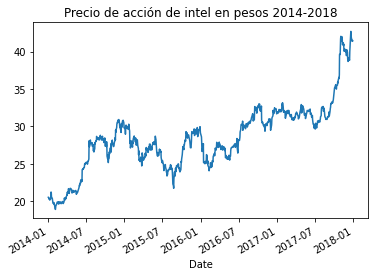

In [ ]:
#graficamos la evolución de la accion
intel['adj_close'].plot()
plt.title('Precio de acción de intel en pesos 2014-2018')
plt.show()

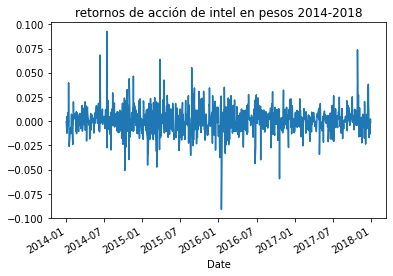

In [ ]:
#graficamos los retornos
intel['retorno_simple'].plot()
plt.title('retornos de acción de intel en pesos 2014-2018')
plt.show()

In [ ]:
#vamos a calcular el promedio movil de la acción a 10 días y a 50 días

intel['MA10'] = intel['adj_close'].rolling(10).mean()
intel['MA50'] = intel['adj_close'].rolling(50).mean()
intel = intel.dropna()
intel.head()

,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50
Date,,,,,,,,,
2014-03-14,24.480000,24.65,24.400000,24.500000,19.681763,21807200,-0.002848,19.784585,19.913297
2014-03-17,24.639999,24.82,24.490000,24.700001,19.842422,18525800,0.008163,19.800651,19.899698
2014-03-18,24.680000,24.90,24.549999,24.820000,19.938820,26344000,0.004858,19.817521,19.888186
2014-03-19,24.850000,25.25,24.770000,25.020000,20.099493,34229400,0.008058,19.859294,19.884981
2014-03-20,25.000000,25.59,24.940001,25.430000,20.428862,37009100,0.016387,19.923561,19.886294


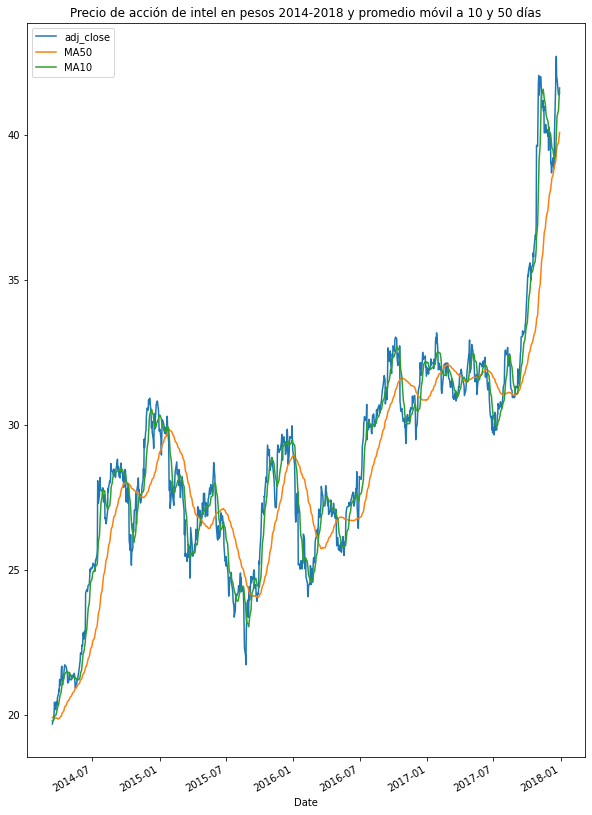

In [ ]:
#vamos a graficar
intel[['adj_close', 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Precio de acción de intel en pesos 2014-2018 y promedio móvil a 10 y 50 días')
plt.show()

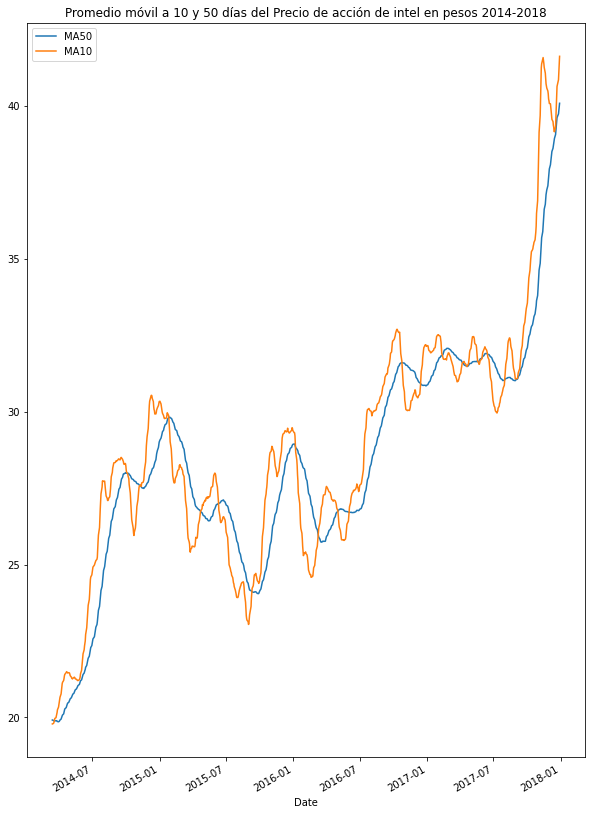

In [ ]:
#vamos a graficar
intel[[ 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Promedio móvil a 10 y 50 días del Precio de acción de intel en pesos 2014-2018')
plt.show()

In [ ]:
#Añadimos una nueva columna llamada "Shares", si MA10>MA50, asignamos un 1, sino, colocamos un 0 

intel['Shares'] = [1 if intel.loc[ei, 'MA10']>intel.loc[ei, 'MA50'] else 0 for ei in intel.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


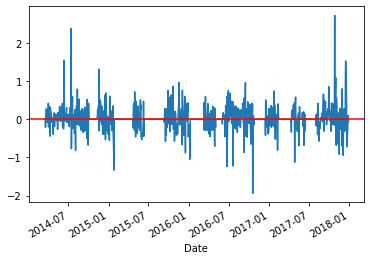

In [ ]:
#Añadimos una nueva columna llamada "Profit" usando 1 y 0 creados con anterioridad
#Shares=1, significa que mantenemos o compramos la acciónpor lo que la genancia 
#es el precio de hoy menos el precio de ayer.
# Si share=0, las ganacias son cero porque no tenemos la acción en el portafolio 0.

#graficamos las pérdidas y ganacias de esta estrategia

intel['close_ayer'] = intel['adj_close'].shift(-1)
intel['Profit'] = [intel.loc[ei, 'close_ayer'] - intel.loc[ei, 'adj_close'] if intel.loc[ei, 'Shares']==1 else 0 for ei in intel.index]
intel['Profit'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [ ]:
#Usamos .cumsum() para calcular las ganacias del periodo

intel['ganancia_acumulada'] = intel['Profit'].cumsum()
intel.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50,Shares,close_ayer,Profit,ganancia_acumulada
Date,,,,,,,,,,,,,
2017-12-22,46.330002,47.020000,46.020000,46.700001,41.950924,33913500,-0.001283,40.645685,39.627074,1,41.393978,-0.556946,19.139784
2017-12-26,46.279999,46.470001,45.950001,46.080002,41.393978,15533300,-0.013276,40.863076,39.746436,1,41.420929,0.026951,19.166735
2017-12-27,46.110001,46.360001,46.000000,46.110001,41.420929,13359700,0.000651,41.112806,39.864730,1,41.519737,0.098808,19.265543
2017-12-28,46.360001,46.360001,45.950001,46.220001,41.519737,9504400,0.002385,41.371517,39.984464,1,41.465828,-0.053909,19.211634
2017-12-29,46.209999,46.490002,46.090000,46.160000,41.465828,17394500,-0.001298,41.632024,40.094904,1,NaN,NaN,NaN


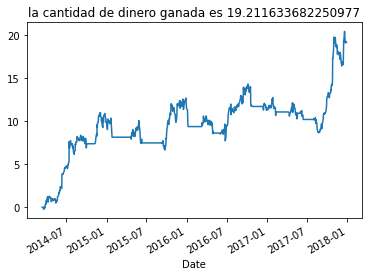

In [ ]:
#graficamos la ganacia acumulada del periodo

intel['ganancia_acumulada'].plot()
plt.title('la cantidad de dinero ganada es {}'.format(intel.loc[intel.index[-2], 'ganancia_acumulada']))
plt.show()

La estrategia planteada de MA10 > MA50 no es del todo mala, funciona cuando la serie se comporta de una manera no tan drástica y no hay tantos picos. Este caso no simpre estará presente, puede que un día haya alguna caída o un alza que no se esperaba por el análisis de la serie de tiempo y la estrategia de MA10 > MA50 no nos ayudará en esto.

En el caso de los brincos exagerados sin previo aviso es muy difícil estar preparado, por lo cual también hay que tener listo un análisis fundamental. En este suceso podemos ver un crecimiento relativamente continuo con Intel; debido a que en este periodo muchas personas empezaron a comprar computadoras y usarlas en su vida diaria, aparte de que Intel fue un monopolio en su inicio. Más adelante, dado que estudiásemos la serie después del 2018, podríamos ver como Intel sufre con su falta de innovación y la constante competencia que AMD le da.

Propongo una estretegia similar, la cual se base en la implementación de resistencias y soportes en las tendencias laterales (periodos del 2015 a mediados del 2017). En tendencias alcistas y bajistas, usaremos líneas de tendecia, uniendo puntos mínimos (o máximos), para saber cuando rompe la tendencia y podría cambiar.

La estretegia propuesta se usaría en conjunto con la estretegia planteada inicialmente. Si ambas propuestas dan luz verde a comprar o vender, se realizará esto, sin embargo, en caso de que solo una de luz verde quedará en el juicio del inversionista si quiere vender o mantenerse. Recalcando que todo esto está siendo acompañado por un análisi técnico, el cual es el mejor indicador para caídas muy bajas o alzas muy altas. 